Project I | Deep Learning: Image Classification with CNN
Task Description
Students will build a Convolutional Neural Network (CNN) model to classify images from a given dataset into predefined categories/classes.

Datasets
The dataset for this task is the CIFAR-10 dataset, which consists of 60,000 32x32 color images in 10 classes, with 6,000 images per class.

Data Preprocessing

Data loading and preprocessing (e.g., normalization, resizing, augmentation).


Create visualizations of some images, and labels.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [2]:

print(x_train.shape)
print(x_train.ndim)
print(x_train.dtype)
print(x_test.shape)

(50000, 32, 32, 3)
4
uint8
(10000, 32, 32, 3)


In [3]:
print (y_test.shape)
print (y_test.ndim)
print (y_test.dtype)
print (y_train.shape)
print (y_train.ndim)
print (y_train.dtype)

(10000, 1)
2
uint8
(50000, 1)
2
uint8


In [4]:
y_train = y_train.flatten()
y_test = y_test.flatten()


In [5]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [6]:
print(y_train[0])
print(y_test[0])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [7]:
print(x_train[0])
print(x_test[0])
print(x_test[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]
[[[158 112  49]
  [159 111  47]
  [165 116  51]
  ...
  [137  95  36]
  [126  91  36]
  [116  85  33]]

 [[152 112  51]
  [151 110  40]
  [159 114  45]
  ...
  [136  95  31]
  [125  91  32]
  [119  88  34]]

 [[151 110  47]
  [151 109  33]
  [158 111  36]
  ...
  [139  98  34]
  [130  95  34]
  [120  89  33]]

 ...

 [[ 68 124 177]
  [ 42 100 148]
  [ 31  88 137]
  ..

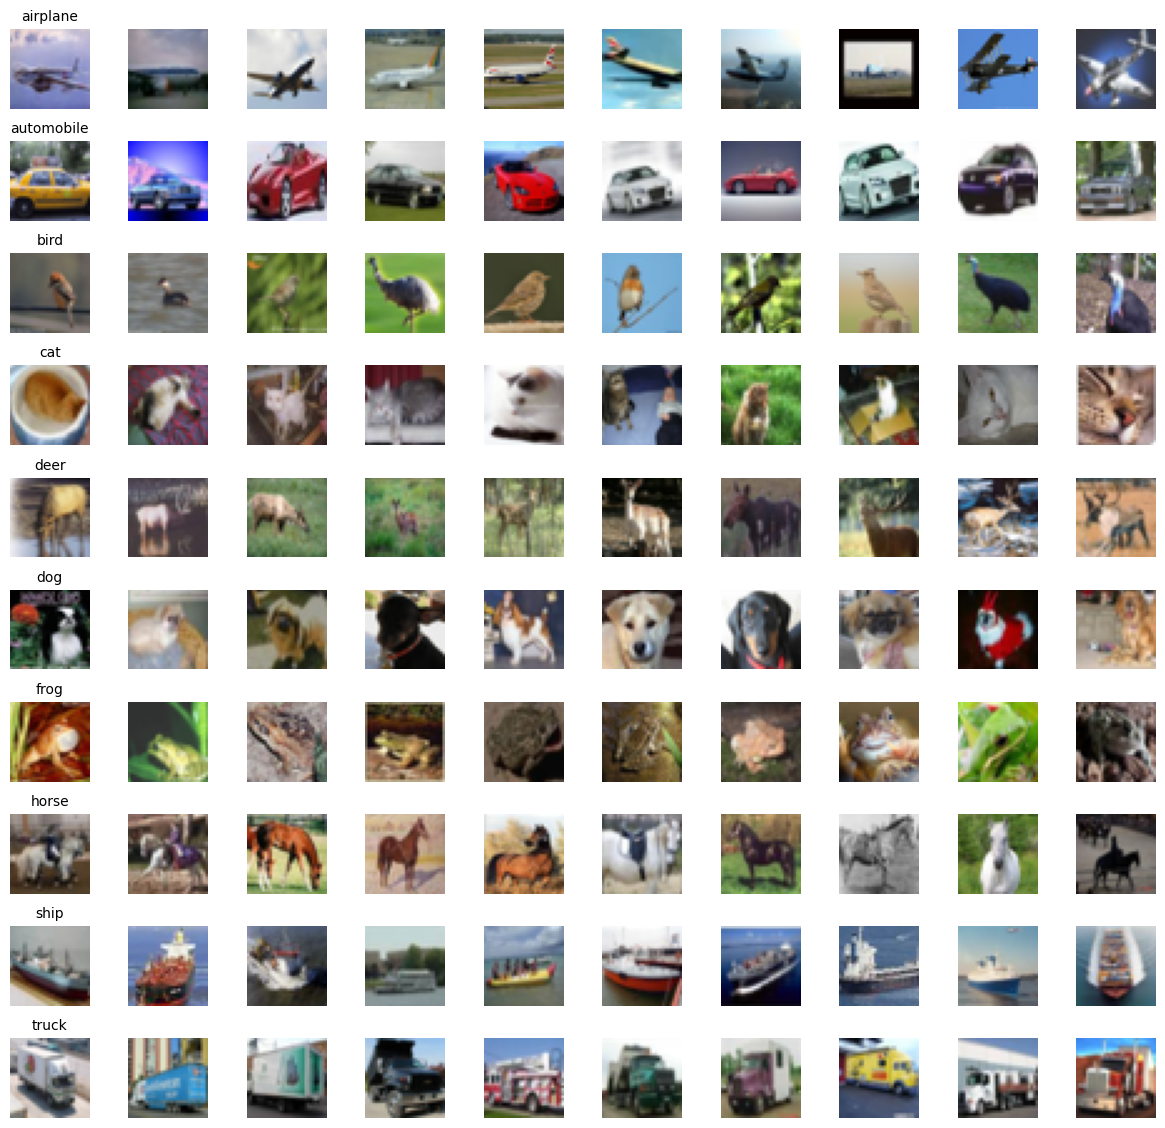

In [8]:
import matplotlib.pyplot as plt

# CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

y_labels = np.argmax(y_train, axis=1)

# Plot 10x10 grid
fig, axes = plt.subplots(10, 10, figsize=(12, 12))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

# For each class (0 to 9)
for class_id in range(10):
    # Get all indices of that class
    idxs = np.where(y_labels == class_id)[0]
    # Choose 10 random samples from that class
    selected_idxs = np.random.choice(idxs, 10, replace=False)

    for i in range(10):
        ax = axes[class_id, i]
        ax.imshow(x_train[selected_idxs[i]])
        ax.axis('off')
        if i == 0:
            ax.set_title(class_names[class_id], fontsize=10)

plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

In [9]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.backend import clear_session

# Clear session
# clear_session()

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)

# CNN model
model = Sequential([
    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),
    Dropout(0.25),

    Conv2D(64, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-5),
    ModelCheckpoint('cnn_optimized_baseline.keras', monitor='val_loss', save_best_only=True)
]

model.fit(datagen.flow(x_train, y_train, batch_size=64),
          validation_data=(x_test, y_test),
          epochs=50,
          callbacks=callbacks)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 50s 49ms/step - accuracy: 0.3457 - loss: 2.0101 - val_accuracy: 0.5296 - val_loss: 1.3532 - learning_rate: 0.0010
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.5388 - loss: 1.2885 - val_accuracy: 0.6394 - val_loss: 1.0446 - learning_rate: 0.0010
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 42ms/step - accuracy: 0.6005 - loss: 1.1239 - val_accuracy: 0.6167 - val_loss: 1.1385 - learning_rate: 0.0010
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 39ms/step - accuracy: 0.6374 - loss: 1.0312 - val_accuracy: 0.6752 - val_loss: 0.9251 - learning_rate: 0.0010
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.6618 - loss: 0.9628 - val_accuracy: 0.6882 - val_loss: 0.9014 - learning_rate: 0.0010
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 39ms/step - accuracy: 0.6800 - loss: 0.9167 - val_accuracy: 0.6564 - val_loss: 1.0221 - learning_rate: 0.0010
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.6967 - loss: 0.8750

 Optimized CNN Baseline (with Data Aug, BatchNorm, LR Scheduling)

In [22]:
import os

# List all files in the current directory
os.listdir('/content')


['.config', 'drive', 'cnn_optimized_baseline.keras', 'sample_data']

In [18]:
model = tf.keras.models.load_model('cnn_optimized_baseline.keras')

In [ ]:
from tensorflow.keras.models import load_model

# Path to the model in Google Drive
model_path = '/content/cnn_optimized_baseline.keras'

# Load the model
model = load_model(model_path)
print("✅ Model loaded successfully from Google Drive!")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step

📋 Classification Report:

              precision    recall  f1-score   support

    airplane       0.86      0.82      0.84      1000
  automobile       0.93      0.93      0.93      1000
        bird       0.80      0.70      0.75      1000
         cat       0.77      0.62      0.69      1000
        deer       0.78      0.81      0.79      1000
         dog       0.85      0.67      0.75      1000
        frog       0.68      0.96      0.80      1000
       horse       0.85      0.88      0.86      1000
        ship       0.91      0.91      0.91      1000
       truck       0.85      0.93      0.89      1000

    accuracy                           0.82     10000
   macro avg       0.83      0.82      0.82     10000
weighted avg       0.83      0.82      0.82     10000



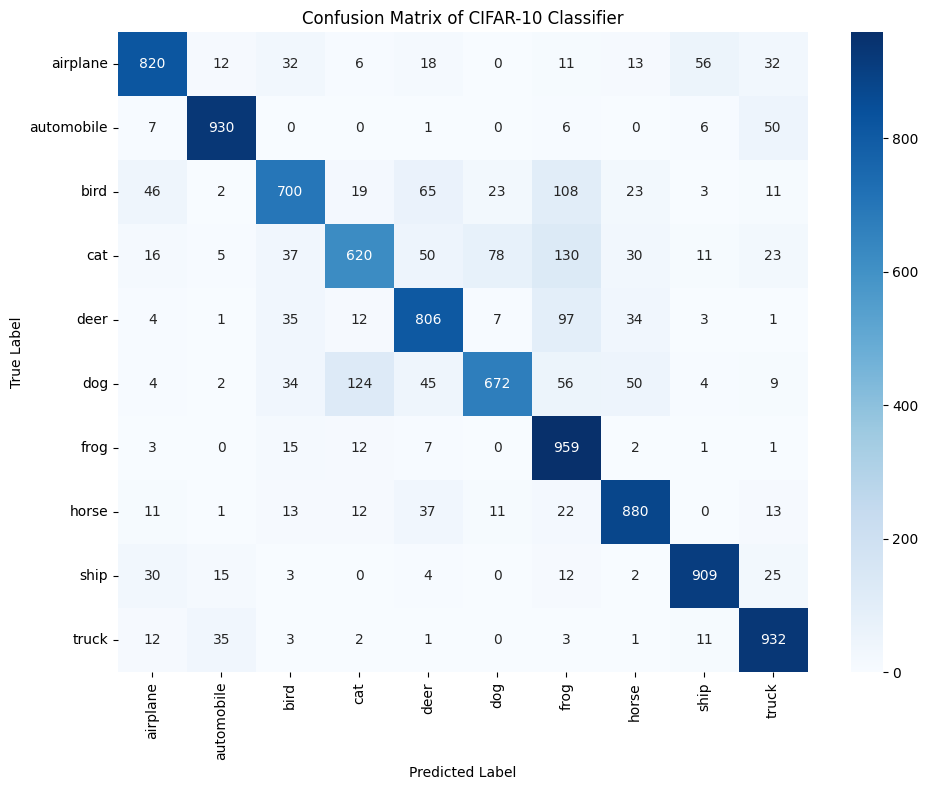

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Get predictions from model
# Assuming you have x_test and y_test already loaded
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)           # predicted labels
y_true = np.argmax(y_test, axis=1)                 # true labels (one-hot to class index)

# Step 2: Classification report
print("\n📋 Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=[
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck']))

# Step 3: Confusion Matrix
conf_mat = confusion_matrix(y_true, y_pred)

# Step 4: Visualize the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=['airplane', 'automobile', 'bird', 'cat', 'deer',
                         'dog', 'frog', 'horse', 'ship', 'truck'],
            yticklabels=['airplane', 'automobile', 'bird', 'cat', 'deer',
                         'dog', 'frog', 'horse', 'ship', 'truck'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of CIFAR-10 Classifier')
plt.tight_layout()
plt.show()


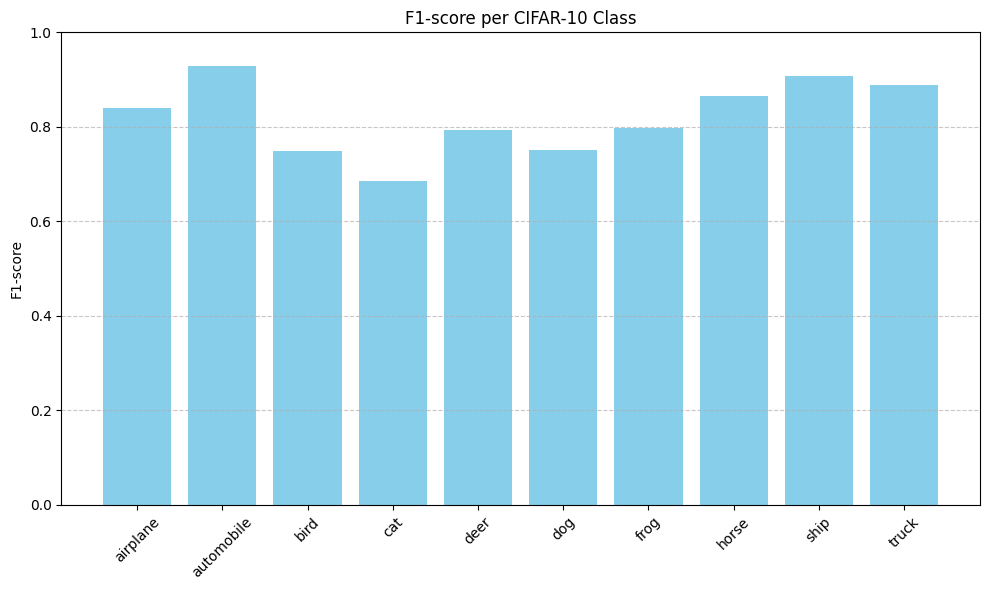

In [26]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Parse classification report into dict
report = classification_report(y_true, y_pred, target_names=[
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'], output_dict=True)

# Extract F1-scores
classes = list(report.keys())[:10]
f1_scores = [report[label]['f1-score'] for label in classes]

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(classes, f1_scores, color='skyblue')
plt.ylabel("F1-score")
plt.title("F1-score per CIFAR-10 Class")
plt.ylim(0, 1.0)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Fine-tuning and continuation to fine-tune the model from the point where it was saved, resume training using the same approach, including callbacks and class weights, etc. Making sure to set model.trainable = True to continue training the pre-trained layers.

In [27]:
# Optionally, unfreeze some layers to fine-tune
for layer in model.layers:
    layer.trainable = True

# Then recompile the model and continue training
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss=loss_fn,
              metrics=['accuracy'])

history = model.fit(
    x_train, y_train_cat,
    validation_data=(x_test, y_test_cat),
    epochs=10,
    batch_size=64,
    callbacks=[lr_scheduler],
    class_weight=class_weights_dict
)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 18ms/step - accuracy: 0.8337 - loss: 1.1006 - val_accuracy: 0.8489 - val_loss: 0.9894 - learning_rate: 1.0000e-04
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8370 - loss: 0.9972 - val_accuracy: 0.8476 - val_loss: 0.9363 - learning_rate: 1.0000e-04
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8362 - loss: 0.9683 - val_accuracy: 0.8532 - val_loss: 0.9171 - learning_rate: 1.0000e-04
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8426 - loss: 0.9507 - val_accuracy: 0.8489 - val_loss: 0.9111 - learning_rate: 1.0000e-04
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8440 - loss: 0.9399 - val_accuracy: 0.8508 - val_loss: 0.9069 - learning_rate: 1.0000e-04
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8486 - loss: 0.9312 - val_accuracy: 0.8498 - val_loss: 0.9016 - learning_rate: 1.0000e-04
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accurac

Helps prevent overfitting and teaches the model to be robust.

In [30]:
model.save("my_finetuned_model.keras")

In [31]:
import os

# List all files in the current directory
os.listdir('/content')


['.config',
 'drive',
 'cnn_optimized_baseline.keras',
 'my_finetuned_model.keras',
 'sample_data']

In [56]:
from tensorflow.keras.models import load_model

# Path to the model in Google Drive
model_path = '/content/my_finetuned_model.keras'

# Load the model
model = load_model(model_path)
print("✅ Model loaded successfully from Google Drive!")

✅ Model loaded successfully from Google Drive!


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step

📋 Classification Report:

              precision    recall  f1-score   support

    airplane       0.87      0.85      0.86      1000
  automobile       0.95      0.91      0.93      1000
        bird       0.79      0.77      0.78      1000
         cat       0.77      0.69      0.73      1000
        deer       0.80      0.87      0.83      1000
         dog       0.78      0.79      0.79      1000
        frog       0.84      0.92      0.88      1000
       horse       0.90      0.88      0.89      1000
        ship       0.90      0.93      0.91      1000
       truck       0.90      0.92      0.91      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



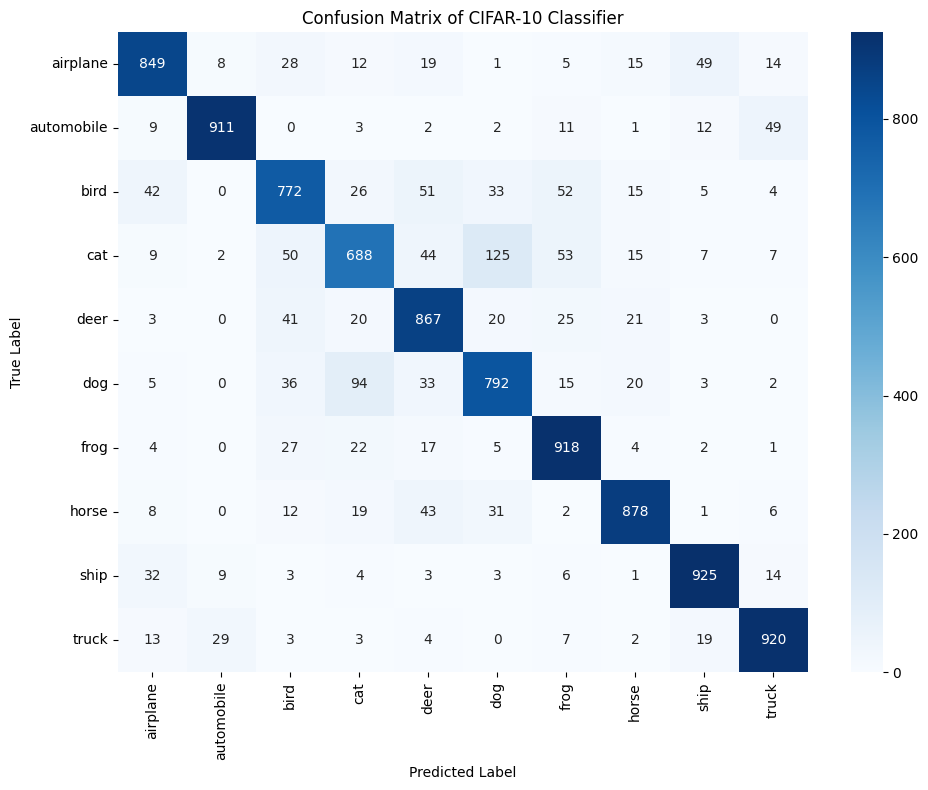

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Get predictions from model
# Assuming you have x_test and y_test already loaded
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)           # predicted labels
y_true = np.argmax(y_test_cat, axis=1)                 # true labels (one-hot to class index)

# Step 2: Classification report
print("\n📋 Classification Report:\n")
# print(classification_report(y_true, y_pred, target_names=[
print(classification_report(np.argmax(y_test_cat, axis=1), y_pred, target_names=[
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck']))

# Step 3: Confusion Matrix
conf_mat = confusion_matrix(y_true, y_pred)

# Step 4: Visualize the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=['airplane', 'automobile', 'bird', 'cat', 'deer',
                         'dog', 'frog', 'horse', 'ship', 'truck'],
            yticklabels=['airplane', 'automobile', 'bird', 'cat', 'deer',
                         'dog', 'frog', 'horse', 'ship', 'truck'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of CIFAR-10 Classifier')
plt.tight_layout()
plt.show()

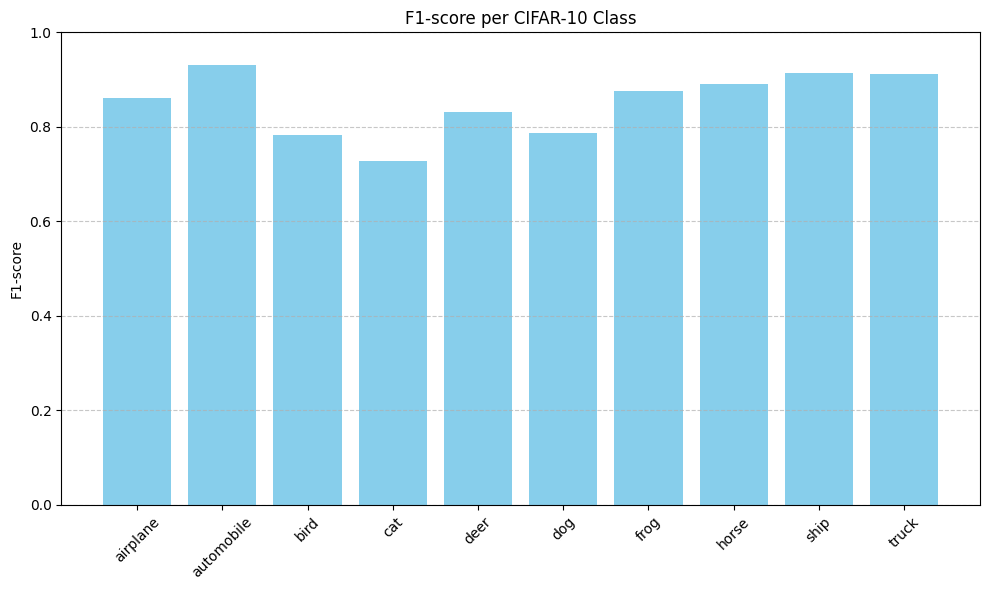

In [60]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Parse classification report into dict
report = classification_report(y_true, y_pred, target_names=[
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'], output_dict=True)

# Extract F1-scores
classes = list(report.keys())[:10]
f1_scores = [report[label]['f1-score'] for label in classes]

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(classes, f1_scores, color='skyblue')
plt.ylabel("F1-score")
plt.title("F1-score per CIFAR-10 Class")
plt.ylim(0, 1.0)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
from tensorflow.keras.models import load_model

# Path to the model in Google Drive
model_path = '/content/my_finetuned_MobileNetV2_model.keras'

# Load the model
model = load_model(model_path)
print("✅ Model loaded successfully from Google Drive!")

In [36]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Load CIFAR-10 data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
num_classes = 10

# Normalize and one-hot encode
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes)
y_test_cat = tf.keras.utils.to_categorical(y_test, num_classes)

# Define base model (MobileNetV2) without top layer, input shape adapted for CIFAR-10
base_model = MobileNetV2(input_shape=(32, 32, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Initially freeze the layers for transfer learning

# Build model with transfer learning
model = models.Sequential([
    base_model,  # Pre-trained MobileNetV2 (transfer learning)
    layers.GlobalAveragePooling2D(),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation='softmax')
])

# Loss function with label smoothing
loss_fn = CategoricalCrossentropy(label_smoothing=0.1)

# Learning rate scheduler
lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-6,
    verbose=1
)

# Calculate class weights (optional, but helps balance)
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train.flatten()),
    y=y_train.flatten()
)
class_weights_dict = dict(enumerate(class_weights))

# Compile model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss=loss_fn,
              metrics=['accuracy'])

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1
)

datagen.fit(x_train)  # Fit the data generator to your training data

# Unfreeze the base model layers (MobileNetV2) for fine-tuning
for layer in base_model.layers:
    layer.trainable = True  # Fine-tune all layers of the base model

# Recompile the model before continuing training
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss=loss_fn,
              metrics=['accuracy'])

# EarlyStopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

# Train the model with transfer learning
history = model.fit(
    datagen.flow(x_train, y_train_cat, batch_size=64),  # Use augmented data
    validation_data=(x_test, y_test_cat),
    epochs=30,
    callbacks=[lr_scheduler, early_stopping],  # Use learning rate scheduler and early stopping
    class_weight=class_weights_dict
)

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test_cat, verbose=2)
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Loss: {loss:.4f}")


<ipython-input-36-f12ff0bbf4c8>:20: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(input_shape=(32, 32, 3), include_top=False, weights='imagenet')


Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 109s 82ms/step - accuracy: 0.2016 - loss: 2.6405 - val_accuracy: 0.1408 - val_loss: 2.7562 - learning_rate: 1.0000e-04
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 43s 54ms/step - accuracy: 0.4098 - loss: 1.9073 - val_accuracy: 0.3964 - val_loss: 2.1419 - learning_rate: 1.0000e-04
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.4965 - loss: 1.6817 - val_accuracy: 0.5602 - val_loss: 1.5855 - learning_rate: 1.0000e-04
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.5598 - loss: 1.5429 - val_accuracy: 0.6056 - val_loss: 1.4232 - learning_rate: 1.0000e-04
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 53ms/step - accuracy: 0.5904 - loss: 1.4545 - val_accuracy: 0.6464 - val_loss: 1.3376 - learning_rate: 1.0000e-04
Epoch 6/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 53ms/step - accuracy: 0.6296 - loss: 1.3772 - val_accuracy: 0.6565 - val_loss: 1.3095 - learning_rate: 1.0000e-04
Epoch 7/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 54ms/step - accura

In [38]:
model.save("my_finetuned_MobileNetV2_model.keras")

In [80]:
import os

# List all files in the current directory
os.listdir('/content')

['.config',
 'drive',
 'my_transfer_learning_improve_class_model.keras',
 'cnn_optimized_baseline.keras',
 'my_finetuned_MobileNetV2_model.keras',
 'my_finetuned_model.keras',
 'sample_data']

In [81]:
from tensorflow.keras.models import load_model

# Path to the model in Google Drive
model_path = '/content/my_finetuned_MobileNetV2_model.keras'

# Load the model
model = load_model(model_path)
print("✅ Model loaded successfully from Google Drive!")

✅ Model loaded successfully from Google Drive!


Model evaluation

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step

📋 Classification Report:

              precision    recall  f1-score   support

    airplane       0.88      0.83      0.86      1000
  automobile       0.86      0.94      0.90      1000
        bird       0.82      0.79      0.80      1000
         cat       0.70      0.70      0.70      1000
        deer       0.81      0.82      0.81      1000
         dog       0.82      0.66      0.73      1000
        frog       0.80      0.92      0.85      1000
       horse       0.84      0.89      0.86      1000
        ship       0.93      0.88      0.91      1000
       truck       0.88      0.89      0.88      1000

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000



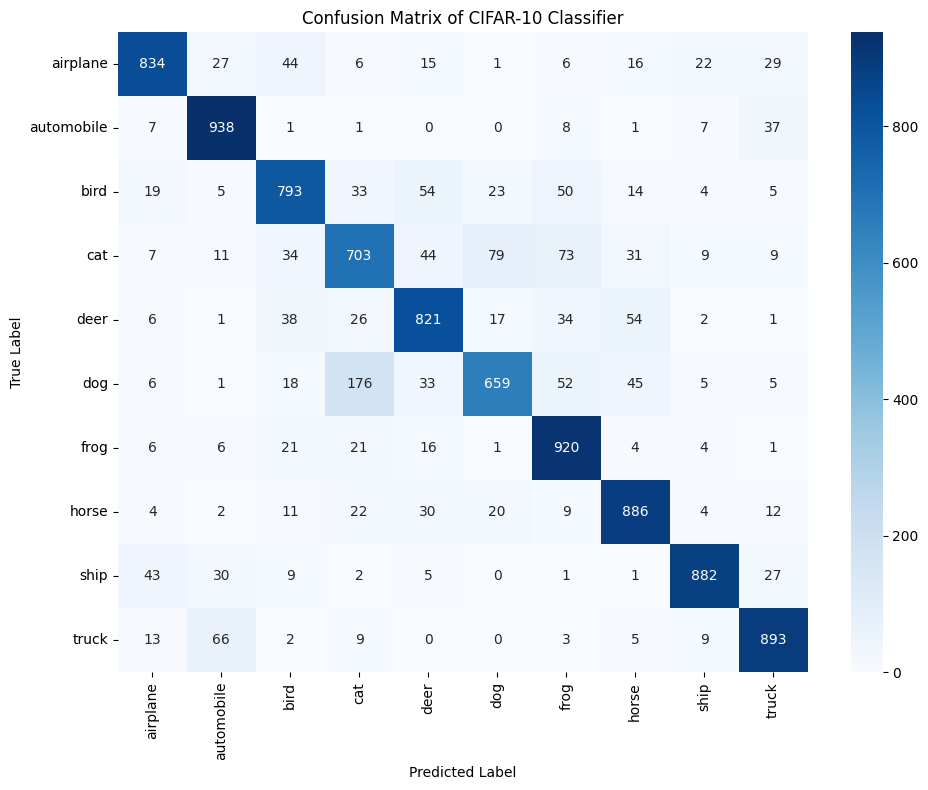

In [82]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Get predictions from model
# Assuming you have x_test and y_test already loaded
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)           # predicted labels
y_true = np.argmax(y_test_cat, axis=1)                 # true labels (one-hot to class index)

# Step 2: Classification report
print("\n📋 Classification Report:\n")
# print(classification_report(y_true, y_pred, target_names=[
print(classification_report(np.argmax(y_test_cat, axis=1), y_pred, target_names=[
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck']))

# Step 3: Confusion Matrix
conf_mat = confusion_matrix(y_true, y_pred)

# Step 4: Visualize the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=['airplane', 'automobile', 'bird', 'cat', 'deer',
                         'dog', 'frog', 'horse', 'ship', 'truck'],
            yticklabels=['airplane', 'automobile', 'bird', 'cat', 'deer',
                         'dog', 'frog', 'horse', 'ship', 'truck'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of CIFAR-10 Classifier')
plt.tight_layout()
plt.show()

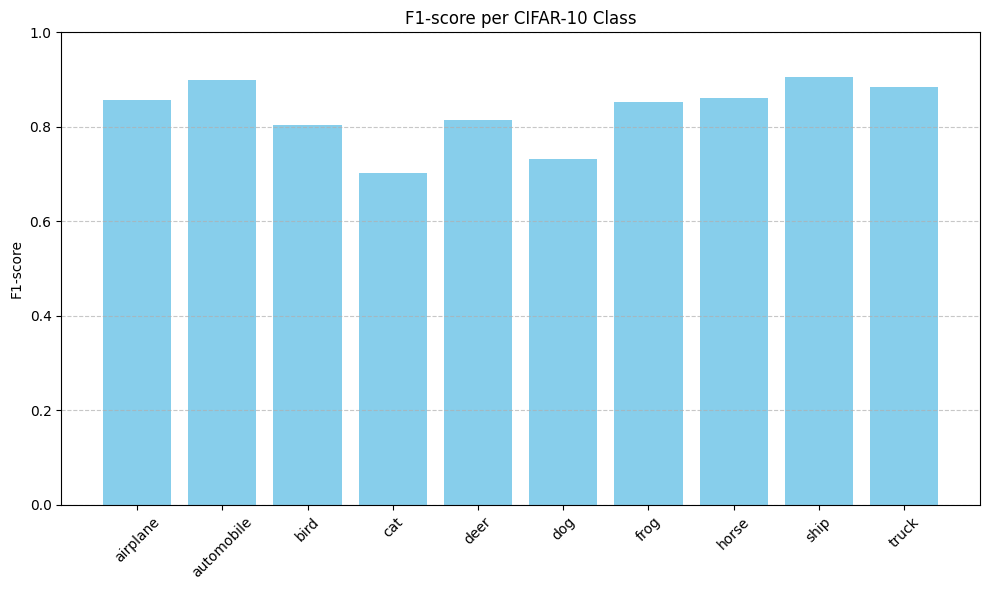

In [83]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Parse classification report into dict
report = classification_report(y_true, y_pred, target_names=[
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'], output_dict=True)

# Extract F1-scores
classes = list(report.keys())[:10]
f1_scores = [report[label]['f1-score'] for label in classes]

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(classes, f1_scores, color='skyblue')
plt.ylabel("F1-score")
plt.title("F1-score per CIFAR-10 Class")
plt.ylim(0, 1.0)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [63]:
from sklearn.metrics import classification_report

y_pred = model.predict(x_test)
y_pred_class = np.argmax(y_pred, axis=-1)
print(classification_report(np.argmax(y_test_cat, axis=-1), y_pred_class))

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step
              precision    recall  f1-score   support

           0       0.88      0.83      0.86      1000
           1       0.86      0.94      0.90      1000
           2       0.82      0.79      0.80      1000
           3       0.70      0.70      0.70      1000
           4       0.81      0.82      0.81      1000
           5       0.82      0.66      0.73      1000
           6       0.80      0.92      0.85      1000
           7       0.84      0.89      0.86      1000
           8       0.93      0.88      0.91      1000
           9       0.88      0.89      0.88      1000

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000



In [64]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Create an ImageDataGenerator for augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1,
    shear_range=0.1
)

# Fit the generator to your training data
datagen.fit(x_train)

# Compute class weights to address class imbalance (optional, but helps in many cases)
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train.flatten()),
    y=y_train.flatten()
)

class_weights_dict = dict(enumerate(class_weights))

# Define model (e.g., MobileNetV2 or your custom model)

# Unfreeze base model layers for fine-tuning (optional)
for layer in base_model.layers[100:]:
    layer.trainable = True

# Recompile the model after unfreezing
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with both data augmentation and class weights
history = model.fit(
    datagen.flow(x_train, y_train_cat, batch_size=64),  # Use augmented data
    validation_data=(x_test, y_test_cat),
    epochs=30,
    class_weight=class_weights_dict  # Provide class weights here
)


Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 125s 96ms/step - accuracy: 0.8600 - loss: 0.4594 - val_accuracy: 0.8370 - val_loss: 0.5149
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - accuracy: 0.8686 - loss: 0.4068 - val_accuracy: 0.8379 - val_loss: 0.5142
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - accuracy: 0.8703 - loss: 0.3966 - val_accuracy: 0.8378 - val_loss: 0.5094
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 54ms/step - accuracy: 0.8683 - loss: 0.3918 - val_accuracy: 0.8368 - val_loss: 0.5094
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 79s 50ms/step - accuracy: 0.8723 - loss: 0.3784 - val_accuracy: 0.8392 - val_loss: 0.4990
Epoch 6/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - accuracy: 0.8730 - loss: 0.3791 - val_accuracy: 0.8390 - val_loss: 0.5037
Epoch 7/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 54ms/step - accuracy: 0.8772 - loss: 0.3704 - val_accuracy: 0.8386 - val_loss: 0.5021
Epoch 8/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 49ms/step - accuracy: 0.8735 - loss: 0.3786 - val_accura

In [65]:
model.save("my_transfer_learning_improve_class_model.keras")

In [76]:
import os

# List all files in the current directory
os.listdir('/content')

['.config',
 'drive',
 'my_transfer_learning_improve_class_model.keras',
 'cnn_optimized_baseline.keras',
 'my_finetuned_MobileNetV2_model.keras',
 'my_finetuned_model.keras',
 'sample_data']

In [87]:
from tensorflow.keras.models import load_model

# Path to the model in Google Drive
model_path = '/content/my_transfer_learning_improve_class_model.keras'

# Load the model
model = load_model(model_path)
print("✅ Model loaded successfully from Google Drive!")

✅ Model loaded successfully from Google Drive!


In [88]:
# This uses the same internal logic as model.evaluate
loss, acc = model.evaluate(x_test, y_test_cat, verbose=0)
print(f"✅ Model.evaluate Accuracy: {acc:.4f}")

# This uses sklearn’s accuracy score from predicted labels
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test_cat, axis=1)

from sklearn.metrics import accuracy_score
acc_manual = accuracy_score(y_true, y_pred)
print(f"🧮 Sklearn Accuracy Score: {acc_manual:.4f}")


✅ Model.evaluate Accuracy: 0.8392
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step
🧮 Sklearn Accuracy Score: 0.8392


157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step

📋 Classification Report:

              precision    recall  f1-score   support

    airplane     0.8861    0.8480    0.8666      1000
  automobile     0.8832    0.9450    0.9130      1000
        bird     0.8072    0.8040    0.8056      1000
         cat     0.7411    0.6640    0.7004      1000
        deer     0.8263    0.8040    0.8150      1000
         dog     0.8287    0.6820    0.7482      1000
        frog     0.7692    0.9400    0.8461      1000
       horse     0.8655    0.8880    0.8766      1000
        ship     0.9251    0.9020    0.9134      1000
       truck     0.8616    0.9150    0.8875      1000

    accuracy                         0.8392     10000
   macro avg     0.8394    0.8392    0.8373     10000
weighted avg     0.8394    0.8392    0.8373     10000



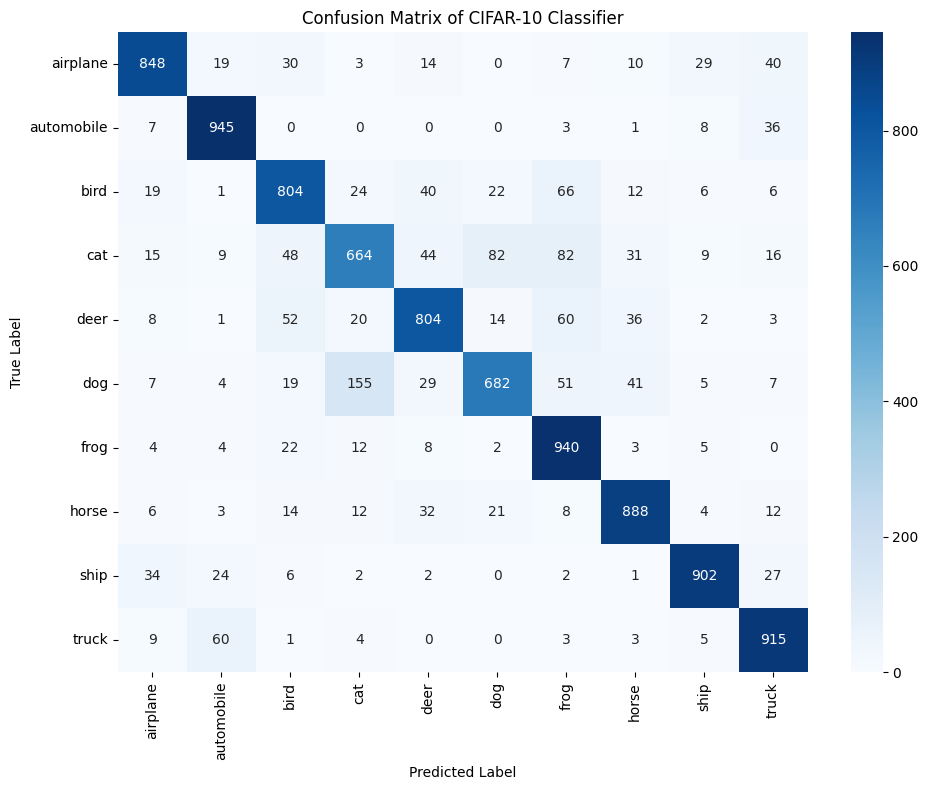

In [89]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Get predictions from model
# Assuming you have x_test and y_test already loaded
y_pred_probs = model.predict(x_test, batch_size=64, verbose=1)
y_pred = np.argmax(y_pred_probs, axis=1)           # predicted labels
y_true = np.argmax(y_test_cat, axis=1)                 # true labels (one-hot to class index)

# Step 2: Print classification report
target_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                'dog', 'frog', 'horse', 'ship', 'truck']

print("\n📋 Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=target_names, digits=4))

# Step 3: Confusion Matrix
conf_mat = confusion_matrix(y_true, y_pred)

# Step 4: Visualize the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=['airplane', 'automobile', 'bird', 'cat', 'deer',
                         'dog', 'frog', 'horse', 'ship', 'truck'],
            yticklabels=['airplane', 'automobile', 'bird', 'cat', 'deer',
                         'dog', 'frog', 'horse', 'ship', 'truck'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of CIFAR-10 Classifier')
plt.tight_layout()
plt.show()

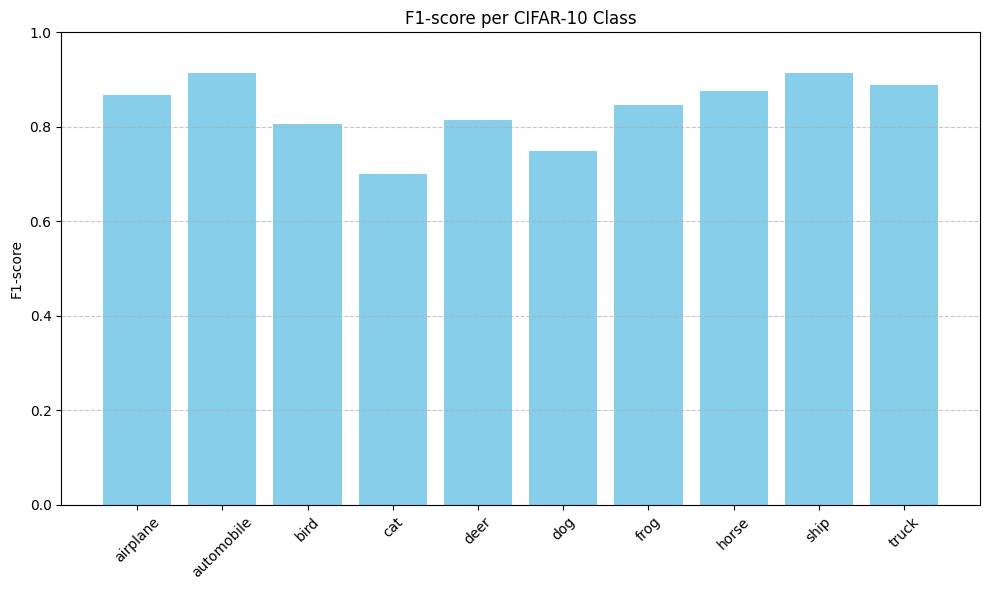

In [90]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Parse classification report into dict
report = classification_report(y_true, y_pred, target_names=[
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'], output_dict=True)

# Extract F1-scores
classes = list(report.keys())[:10]
f1_scores = [report[label]['f1-score'] for label in classes]

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(classes, f1_scores, color='skyblue')
plt.ylabel("F1-score")
plt.title("F1-score per CIFAR-10 Class")
plt.ylim(0, 1.0)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [91]:
from tensorflow.keras.models import load_model

# Path to the model in Google Drive
model_path = '/content/my_finetuned_model.keras'

# Load the model
model = load_model(model_path)
print("✅ Model loaded successfully from Google Drive!")

✅ Model loaded successfully from Google Drive!


In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16, ResNet50, EfficientNetB0
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Load CIFAR-10 data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
num_classes = 10

# Normalize and one-hot encode
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes)
y_test_cat = tf.keras.utils.to_categorical(y_test, num_classes)

# Set up data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1,
    shear_range=0.1
)
datagen.fit(x_train)

# Compute class weights (optional)
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train.flatten()),
    y=y_train.flatten()
)
class_weights_dict = dict(enumerate(class_weights))

# Function to create the model based on the backbone
def create_model(backbone):
    # Define the model with transfer learning using the backbone
    model = models.Sequential([
        backbone,
        layers.GlobalAveragePooling2D(),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# Backbones to test
backbones = {
    "VGG16": VGG16(input_shape=(32, 32, 3), include_top=False, weights='imagenet'),
    "ResNet50": ResNet50(input_shape=(32, 32, 3), include_top=False, weights='imagenet'),
    "EfficientNetB0": EfficientNetB0(input_shape=(32, 32, 3), include_top=False, weights='imagenet')
}

# Training loop for each backbone
for backbone_name, backbone in backbones.items():
    print(f"\nTraining model with {backbone_name}...\n")

    # Freeze base model layers
    backbone.trainable = False

    # Create and compile the model
    model = create_model(backbone)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                  loss=CategoricalCrossentropy(label_smoothing=0.1),
                  metrics=['accuracy'])

    # Learning rate scheduler and early stopping
    lr_scheduler = ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=3,
        min_lr=1e-6,
        verbose=1
    )
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True,
        verbose=1
    )

    # Train the model
    history = model.fit(
        datagen.flow(x_train, y_train_cat, batch_size=64),
        validation_data=(x_test, y_test_cat),
        epochs=30,
        class_weight=class_weights_dict,
        callbacks=[lr_scheduler, early_stopping]
    )

    # Save the trained model
    model.save(f"/content/{backbone_name}_model.keras")
    print(f"{backbone_name} model saved as {backbone_name}_model.keras")

# Model training for each backbone will now be saved


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

Training model with VGG16...

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 53s 58ms/step - accuracy: 0.2205 - loss: 2.6330 - val_accuracy: 0.4645 - val_loss: 1.7319 - learning_rate: 1.0000e-04
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - accuracy: 0.3699 - loss: 2.0401 - val_accuracy: 0.5078 - val_loss: 1.6304 - learning_rate: 1.0000e-04
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 48ms/step - accuracy: 0.4039 - loss: 1.9098 - val_accuracy: 0.5260 - val_loss: 1.5823 - learning_rate: 1.0000e-04
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 47ms/step - accuracy: 0.4309 - loss: 1.8294 - val_accuracy: 0.5366 - val_loss: 1.5513 - learning_rate: 1.0000e-04
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 50ms/step - accuracy: 0.4393 - loss: 1.7828 - val_accuracy: 0.5443 - val_loss: 1.5332 - learning_rate: 1.0000e-04
Epoch 6/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 48ms/step - accuracy: 0.4529 - loss: 1.7509 - val_accuracy: 0.5480 - val_loss: 1.5208 - learning_rate: 1.0000e-04
Epoch 7/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 47ms/step - accurac

 Learning Rate Scheduler
Let the model train longer with smarter learning rate adjustments.

In [2]:
import os

# List all files in the current directory
os.listdir('/content')


['.config',
 'drive',
 'my_transfer_learning_improve_class_model.keras',
 'VGG16_model.keras',
 'ResNet50_model.keras',
 'cnn_optimized_baseline.keras',
 'EfficientNetB0_model.keras',
 'my_finetuned_MobileNetV2_model.keras',
 'my_finetuned_model.keras',
 'sample_data']

In [3]:
from tensorflow.keras.models import load_model

# Path to the model in Google Drive
model_path = '/content/my_finetuned_MobileNetV2_model.keras'

# Load the model
model = load_model(model_path)
print("✅ Model loaded successfully from Google Drive!")

✅ Model loaded successfully from Google Drive!


In [4]:
# Count trainable layers in the entire model
trainable_count = sum([layer.trainable for layer in model.layers])
print(f"Top-level trainable layers: {trainable_count}")

# base_model layers like MobileNetV2
if hasattr(model.layers[0], 'layers'):
    base_trainable = sum([layer.trainable for layer in model.layers[0].layers])
    print(f"Base model trainable layers: {base_trainable}")

    total_trainable = sum([layer.count_params() for layer in model.layers if layer.trainable])
    print(f"Total trainable parameters: {total_trainable}")


Top-level trainable layers: 7
Base model trainable layers: 154
Total trainable parameters: 336650


In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from tensorflow.keras.losses import CategoricalCrossentropy
import numpy as np

# Load CIFAR-10
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
num_classes = 10

x_train, x_test = x_train / 255.0, x_test / 255.0
y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes)
y_test_cat = tf.keras.utils.to_categorical(y_test, num_classes)

# Build base model
base_model = MobileNetV2(input_shape=(32, 32, 3), include_top=False, weights='imagenet')
base_model.trainable = False

# Full model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation='softmax')
])

loss_fn = CategoricalCrossentropy(label_smoothing=0.1)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss=loss_fn,
              metrics=['accuracy'])

# Initial training (base frozen)
model.fit(x_train, y_train_cat,
          validation_data=(x_test, y_test_cat),
          epochs=5,
          batch_size=64)

# Unfreeze last 30 layers of base model
for layer in base_model.layers[-30:]:
    layer.trainable = True

# Recompile
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss=loss_fn,
              metrics=['accuracy'])

# Callbacks
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint("mobilenetv2_finetuned.keras", save_best_only=True)

# Fine-tuning
history = model.fit(x_train, y_train_cat,
                    validation_data=(x_test, y_test_cat),
                    epochs=10,
                    batch_size=64,
                    callbacks=[lr_scheduler, early_stop, checkpoint])


<ipython-input-5-3b87b53e3be1>:17: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(input_shape=(32, 32, 3), include_top=False, weights='imagenet')


Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 26s 20ms/step - accuracy: 0.1541 - loss: 2.7834 - val_accuracy: 0.2830 - val_loss: 2.1482
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.2192 - loss: 2.3511 - val_accuracy: 0.3073 - val_loss: 2.0921
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.2342 - loss: 2.2567 - val_accuracy: 0.3149 - val_loss: 2.0566
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.2428 - loss: 2.2104 - val_accuracy: 0.3184 - val_loss: 2.0381
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.2566 - loss: 2.1676 - val_accuracy: 0.3216 - val_loss: 2.0250
Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 26ms/step - accuracy: 0.1495 - loss: 2.5095 - val_accuracy: 0.1033 - val_loss: 2.3357 - learning_rate: 1.0000e-05
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - accuracy: 0.2598 - loss: 2.1856 - val_accuracy: 0.1148 - val_loss: 2.3323 - learning_rate: 1.0000e-05
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10

In [6]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
x_train = preprocess_input(x_train)
x_test = preprocess_input(x_test)


In [7]:
for layer in base_model.layers[-15:]:
    layer.trainable = True

In [8]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)

In [9]:
model.fit(datagen.flow(x_train, y_train_cat, batch_size=64),
          validation_data=(x_test, y_test_cat),
          epochs=10,
          callbacks=[lr_scheduler, early_stop, checkpoint])


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 56s 55ms/step - accuracy: 0.1626 - loss: 2.5976 - val_accuracy: 0.1105 - val_loss: 2.4272 - learning_rate: 1.0000e-05
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 67s 46ms/step - accuracy: 0.2324 - loss: 2.2147 - val_accuracy: 0.1127 - val_loss: 2.3729 - learning_rate: 1.0000e-05
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 44ms/step - accuracy: 0.2573 - loss: 2.1473 - val_accuracy: 0.1594 - val_loss: 2.2680 - learning_rate: 1.0000e-05
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 48ms/step - accuracy: 0.2742 - loss: 2.1034 - val_accuracy: 0.1717 - val_loss: 2.1959 - learning_rate: 1.0000e-05
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 44ms/step - accuracy: 0.2914 - loss: 2.0809 - val_accuracy: 0.2316 - val_loss: 2.1182 - learning_rate: 1.0000e-05
Epoch 6/10
455/782 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step - accuracy: 0.3013 - loss: 2.0490

KeyboardInterrupt: 

In [10]:

from tensorflow.keras.models import load_model

# Path to the model in Google Drive
model_path = '/content/my_finetuned_MobileNetV2_model.keras'

# Load the model
model = load_model(model_path)
print("✅ Model loaded successfully from Google Drive!")

✅ Model loaded successfully from Google Drive!


In [11]:
base_model = model.layers[0]  # MobileNetV2 as first layer
print(f"Base model layers: {len(base_model.layers)}")


Base model layers: 154


In [12]:
for layer in base_model.layers[-100:]:
    layer.trainable = True


In [13]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [14]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=2, verbose=1, min_lr=1e-6
)
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    datagen.flow(x_train, y_train_cat, batch_size=64),
    validation_data=(x_test, y_test_cat),
    epochs=10,
    callbacks=[lr_scheduler, early_stop],
    class_weight=class_weights_dict
)
model.save('/content/my_finetuned_model_tuned_layers100.keras')

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 117s 86ms/step - accuracy: 0.2720 - loss: 2.4405 - val_accuracy: 0.1000 - val_loss: 3.3113 - learning_rate: 1.0000e-05
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 53ms/step - accuracy: 0.4001 - loss: 1.7692 - val_accuracy: 0.1000 - val_loss: 2.8825 - learning_rate: 1.0000e-05
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 54ms/step - accuracy: 0.4487 - loss: 1.6018 - val_accuracy: 0.1158 - val_loss: 2.7763 - learning_rate: 1.0000e-05
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - accuracy: 0.4948 - loss: 1.4793 - val_accuracy: 0.1207 - val_loss: 2.8731 - learning_rate: 1.0000e-05
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.5322 - loss: 1.3704
Epoch 5: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-06.
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 53ms/step - accuracy: 0.5322 - loss: 1.3704 - val_accuracy: 0.1216 - val_loss: 3.1313 - learning_rate: 1.0000e-05
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - a

In [15]:

from tensorflow.keras.models import load_model

# Path to the model in Google Drive
model_path = '/content/my_finetuned_MobileNetV2_model.keras'

# Load the model
model = load_model(model_path)
print("✅ Model loaded successfully from Google Drive!")


✅ Model loaded successfully from Google Drive!


In [16]:
for i, layer in enumerate(model.layers):
    print(f"{i}: {layer.name}, trainable={layer.trainable}")


0: mobilenetv2_1.00_224, trainable=False
1: global_average_pooling2d_3, trainable=True
2: batch_normalization_4, trainable=True
3: dropout_5, trainable=True
4: dense_6, trainable=True
5: batch_normalization_5, trainable=True
6: dropout_6, trainable=True
7: dense_7, trainable=True


 Transfer Learning (Freeze pretrained base, train classifier)

In [17]:
# base_model = model.layers[0]  # assuming it's still the first


In [18]:
# # Unfreeze the top 50 layers of the base model
# for layer in base_model.layers[-50:]:
#     layer.trainable = True


In [19]:
# model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
#               loss=loss_fn,
#               metrics=['accuracy'])


In [20]:
for i, layer in enumerate(base_model.layers):
    print(f"{i}: {layer.name}, trainable={layer.trainable}")


0: input_layer_7, trainable=True
1: Conv1, trainable=True
2: bn_Conv1, trainable=True
3: Conv1_relu, trainable=True
4: expanded_conv_depthwise, trainable=True
5: expanded_conv_depthwise_BN, trainable=True
6: expanded_conv_depthwise_relu, trainable=True
7: expanded_conv_project, trainable=True
8: expanded_conv_project_BN, trainable=True
9: block_1_expand, trainable=True
10: block_1_expand_BN, trainable=True
11: block_1_expand_relu, trainable=True
12: block_1_pad, trainable=True
13: block_1_depthwise, trainable=True
14: block_1_depthwise_BN, trainable=True
15: block_1_depthwise_relu, trainable=True
16: block_1_project, trainable=True
17: block_1_project_BN, trainable=True
18: block_2_expand, trainable=True
19: block_2_expand_BN, trainable=True
20: block_2_expand_relu, trainable=True
21: block_2_depthwise, trainable=True
22: block_2_depthwise_BN, trainable=True
23: block_2_depthwise_relu, trainable=True
24: block_2_project, trainable=True
25: block_2_project_BN, trainable=True
26: block_2

In [25]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Load your pre-trained model with 0.85 accuracy
model = load_model('/content/my_finetuned_model.keras')

# Get the base model (MobileNetV2) from the pre-trained model
base_model = model.layers[0]  # The first layer is the base model

# Unfreeze the last 40 layers of the base model for fine-tuning
for layer in base_model.layers[-40:]:
    layer.trainable = True

# Double-check how many are now trainable
trainable_count = sum([layer.trainable for layer in base_model.layers])
print(f"Base model trainable layers: {trainable_count}")

# Recompile the model with a low learning rate
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
    metrics=['accuracy']
)

# Define callbacks
callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1, min_lr=1e-6),
    EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True, verbose=1)
]

# Continue training
history_finetune = model.fit(
    x_train, y_train_cat,
    validation_data=(x_test, y_test_cat),
    epochs=20,
    batch_size=64,
    callbacks=callbacks,
    class_weight=class_weights_dict
)

# Save the new fine-tuned model
model.save('/content/my_finetuned_model_unfreeze40.keras')


AttributeError: 'Conv2D' object has no attribute 'layers'

In [21]:
# Unfreeze last 40 layers of the base model
for layer in base_model.layers[-50:]:
    layer.trainable = True


In [22]:
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
              loss=loss_fn,
              metrics=['accuracy'])


In [23]:
trainable_count = sum([layer.trainable for layer in base_model.layers])
print(f"Base model trainable layers: {trainable_count}")


Base model trainable layers: 154


 Plot Training History

Confusion Matrix

In [ ]:
from keras.backend import clear_session
clear_session()

In [ ]:
# Your code here :

In [ ]:
# Your code here :